In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
data = pd.read_csv("C:\\New folder\\Toyoto_Corrola.csv")
data.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [ ]:
data.drop(['Id', 'Model'], axis=1, inplace=True)

In [33]:
data

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,5,1025
1432,10845,72,19000,86,3,5,1015
1433,8500,71,17016,86,3,5,1015
1434,7250,70,16916,86,3,5,1015


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Doors      1436 non-null   int64
 5   Gears      1436 non-null   int64
 6   Weight     1436 non-null   int64
dtypes: int64(7)
memory usage: 78.7 KB


In [35]:
data.isnull().sum().sum()

0

In [37]:
 data.corr()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,0.020613,1.000000


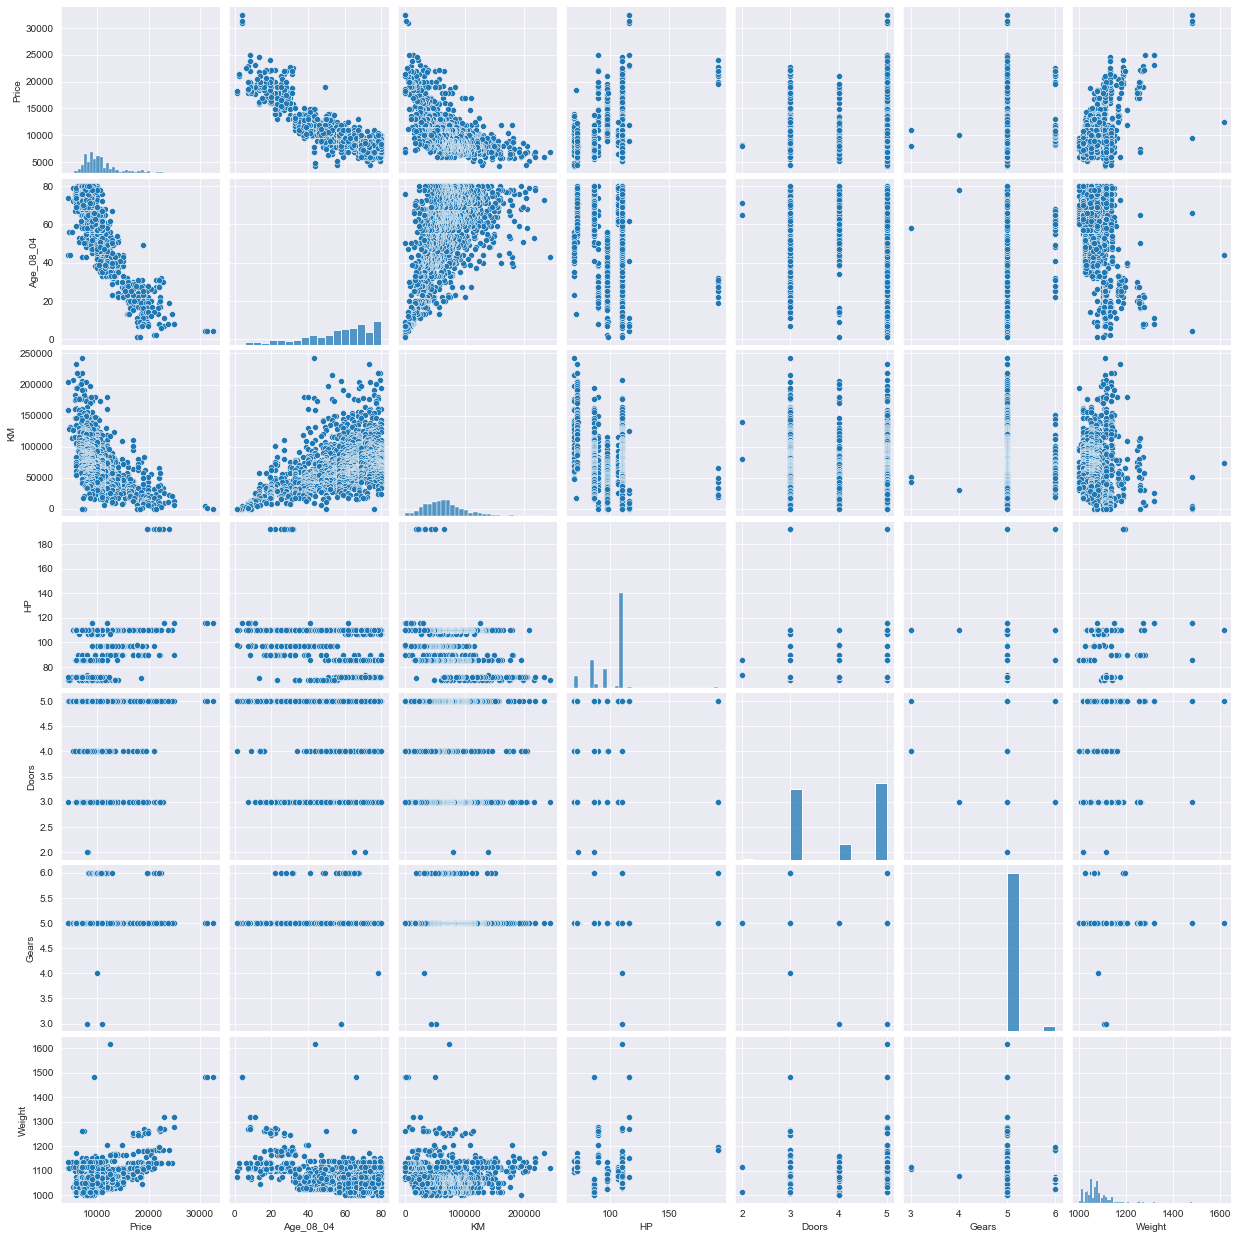

In [38]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [39]:
model = smf.ols('Price~Age_08_04+KM+HP+Gears+Weight',data=data).fit()

In [40]:
model.params

Intercept   -7006.827227
Age_08_04    -122.243676
KM             -0.019996
HP             28.282948
Gears         631.543519
Weight         18.557373
dtype: float64

In [41]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.355584
Age_08_04   -46.745013
KM          -16.550661
HP           10.881794
Gears         3.262043
Weight       23.192000
dtype: float64 
 Intercept     9.925271e-08
Age_08_04    2.772608e-290
KM            1.985300e-56
HP            1.496107e-26
Gears         1.132207e-03
Weight       2.904479e-101
dtype: float64


In [42]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8627968258548101, 0.86231709447668)

In [62]:
rsq_hp = smf.ols('HP~Age_08_04+KM+Doors+Gears+Weight',data=data).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

rsq_d = smf.ols('Doors~Age_08_04+KM+HP+Gears+Weight',data=data).fit().rsquared  
vif_d = 1/(1-rsq_d) 

rsq_g = smf.ols('Gears~Age_08_04+KM+HP+Doors+Weight',data=data).fit().rsquared  
vif_g = 1/(1-rsq_g) 

rsq_a = smf.ols('Age_08_04~Gears+KM+HP+Doors+Weight',data=data).fit().rsquared  
vif_a = 1/(1-rsq_a) 

rsq_km = smf.ols('KM~Age_08_04+Gears+HP+Doors+Weight',data=data).fit().rsquared  
vif_km= 1/(1-rsq_km) 

rsq_w = smf.ols('Weight~Age_08_04+KM+HP+Doors+Gears',data=data).fit().rsquared  
vif_w = 1/(1-rsq_g) 




# Storing vif values in a data frame
d = {'Variables':['HP','Doors','Gears','Age_08_04','KM','Weight'],'VIF':[vif_hp,vif_d,vif_g,vif_a,vif_km,vif_w]}
Vif_frame = pd.DataFrame(d)  
Vif_frame

,Variables,VIF
0,HP,1.214909
1,Doors,1.149301
2,Gears,1.096501
3,Age_08_04,1.874542
4,KM,1.627039
5,Weight,1.096501


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


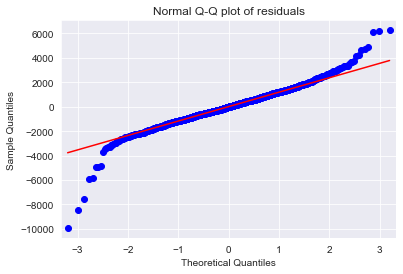

In [63]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [64]:
list(np.where(model.resid>5000))

[array([109, 147, 523], dtype=int64)]

In [65]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

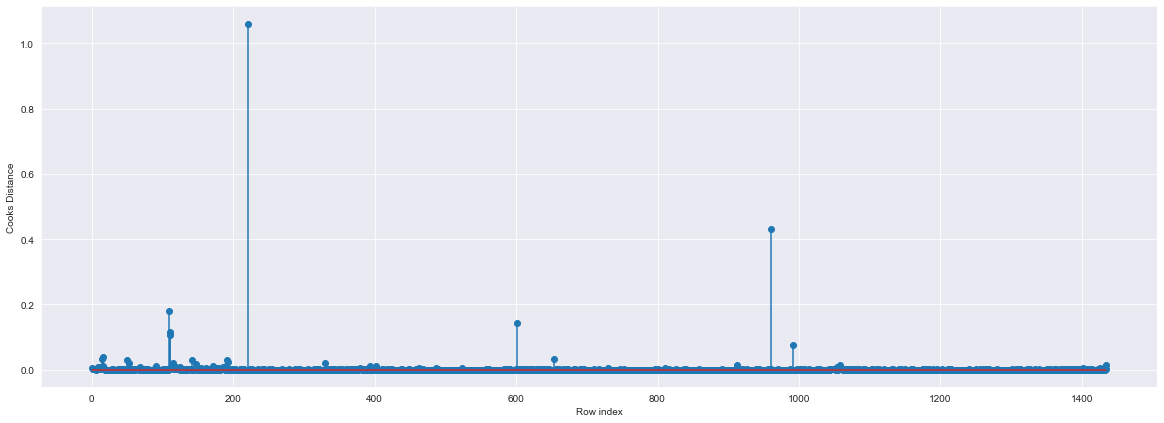

In [66]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [68]:
(np.argmax(c),np.max(c))

(221, 1.0607870279725373)

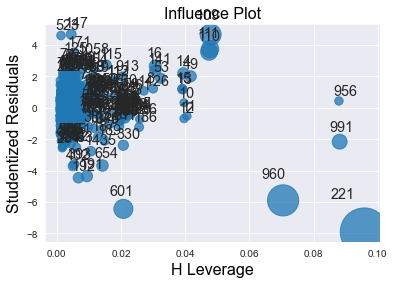

In [69]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [70]:
data.shape

(1436, 7)

In [71]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.016713091922005572

In [72]:
data[data.index.isin([221, 601, 960])]

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
221,12450,44,74172,110,5,5,1615
601,7500,50,1,90,3,5,1260
960,9390,66,50806,86,3,5,1480


In [73]:
data.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [74]:
car=data.reset_index()

In [75]:
car

,index,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,0,13500,23,46986,90,3,5,1165
1,1,13750,23,72937,90,3,5,1165
2,2,13950,24,41711,90,3,5,1165
3,3,14950,26,48000,90,3,5,1165
4,4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...,...
1431,1431,7500,69,20544,86,3,5,1025
1432,1432,10845,72,19000,86,3,5,1015
1433,1433,8500,71,17016,86,3,5,1015
1434,1434,7250,70,16916,86,3,5,1015


In [76]:
car1=car.drop(['index'],axis=1)
car1

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,5,1025
1432,10845,72,19000,86,3,5,1015
1433,8500,71,17016,86,3,5,1015
1434,7250,70,16916,86,3,5,1015


In [77]:
final_ml_V1= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data = car1).fit()

In [78]:
(final_ml_V1.rsquared_adj,final_ml_V1.aic)

(0.8622263942190831, 24775.163063711654)